# Session 14: Gradient Descent for Multivariate Linear Regression

In this session, we will:
1. Learn the basics of **NumPy** for numerical computing
2. Understand **gradient descent** optimization
3. Implement **multivariate linear regression** from scratch

---
## Part 1: Introduction to NumPy

NumPy is the fundamental package for numerical computing in Python. It provides:
- N-dimensional arrays (`ndarray`)
- Broadcasting for element-wise operations
- Linear algebra operations
- Mathematical functions optimized for arrays

In [188]:
import numpy as np

alias

### 1.1 Creating Arrays

In [189]:
# From Python lists
arr1 = np.array([-1, 2, 3, 4, 5], dtype=np.int8)
print(f"1D array: {arr1}")
print(f"Shape: {arr1.shape}")
print(f"Dtype: {arr1.dtype}")

1D array: [-1  2  3  4  5]
Shape: (5,)
Dtype: int8


In [190]:
# 2D array (matrix)
arr2 = np.array([[1, 2, 3], 
                 [4, 5, 6]])
print(f"2D array:\n{arr2}")
print(f"Shape: {arr2.shape}")  # (rows, columns)

2D array:
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)


In [191]:
# Common array creation functions
zeros = np.zeros((3, 4))       # 3x4 matrix of zeros
ones = np.ones((2, 3))         # 2x3 matrix of ones
random = np.random.randn(3, 3) # 3x3 matrix of random values (normal distribution)
arange = np.arange(0, 10, 2)   # [0, 2, 4, 6, 8]
linspace = np.linspace(0, 1, 5) # 5 evenly spaced values from 0 to 1

print(f"zeros:\n{zeros}\n")
print(f"ones:\n{ones}\n")
print(f"random:\n{random}\n")
print(f"arange: {arange}")
print(f"linspace: {linspace}")

zeros:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

ones:
[[1. 1. 1.]
 [1. 1. 1.]]

random:
[[ 2.2408932   0.87126183  0.15357091]
 [-0.89735666  1.46093056  0.01185509]
 [ 1.21866111 -0.36522833 -0.09853037]]

arange: [0 2 4 6 8]
linspace: [0.   0.25 0.5  0.75 1.  ]


### 1.2 Array Operations and Broadcasting

NumPy operations are **element-wise** by default. Broadcasting allows operations between arrays of different shapes.

In [192]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(f"a + b = {a + b}")      # Element-wise addition
print(f"a * b = {a * b}")      # Element-wise multiplication
print(f"a ** 2 = {a ** 2}")    # Element-wise power
print(f"a * 10 = {a * 10}")    # Broadcasting: scalar applied to all elements

a + b = [5 7 9]
a * b = [ 4 10 18]
a ** 2 = [1 4 9]
a * 10 = [10 20 30]


In [193]:
# Broadcasting with 2D arrays
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
row_vector = np.array([10, 20, 30])

"""
[[10, 20, 30],
[10, 20 ,30]]
"""

# The row vector is "broadcast" to each row of the matrix
result = matrix + row_vector
print(f"Matrix + row_vector:\n{result}")

Matrix + row_vector:
[[11 22 33]
 [14 25 36]]


### 1.3 Matrix Operations

For linear regression, we need matrix multiplication and transpose.

In [194]:
A = np.array([[1, 2], 
              [3, 4]])
B = np.array([[5, 6], 
              [7, 8]])

# Matrix multiplication (dot product)
print(f"A @ B (matrix multiplication):\n{A @ B}")
print(f"\nnp.dot(A, B):\n{np.dot(A, B)}")

# Transpose
print(f"\nA.T (transpose):\n{A.T}")

A @ B (matrix multiplication):
[[19 22]
 [43 50]]

np.dot(A, B):
[[19 22]
 [43 50]]

A.T (transpose):
[[1 3]
 [2 4]]


### 1.4 Useful Aggregation Functions

In [195]:
arr = np.array([[1, 2, 3],
                [4, 5, 6]])

print(f"Sum all: {np.sum(arr)}")
print(f"Sum along rows (axis=1): {np.sum(arr, axis=1)}")
print(f"Sum along columns (axis=0): {np.sum(arr, axis=0)}")
print(f"Mean: {np.mean(arr)}")
print(f"Std: {np.std(arr)}")

Sum all: 21
Sum along rows (axis=1): [ 6 15]
Sum along columns (axis=0): [5 7 9]
Mean: 3.5
Std: 1.707825127659933


---
## Part 2: Linear Regression Review

### What is Linear Regression?

Linear regression models the relationship between features $X$ and target $y$ as:

$$\hat{y} = X \cdot w + b$$

Where:
- $X$ is the feature matrix of shape `(n_samples, n_features)`
- $w$ is the weight vector of shape `(n_features,)`
- $b$ is the bias (intercept) scalar
- $\hat{y}$ is the predicted values

### The Goal

Find $w$ and $b$ that minimize the **Mean Squared Error (MSE)**:

$$\mathcal{L} = MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_i} - y_i)^2$$

### Gradients for Linear Regression

For MSE loss with linear regression, the gradients are:

$$\nabla_w \mathcal{L} = \frac{\partial \mathcal{L}}{\partial w} = \frac{\partial MSE}{\partial w} = \frac{2}{n}  (\hat{y} - y) X$$

$$\nabla_b \mathcal{L} = \frac{\partial \mathcal{L}}{\partial b} = \frac{\partial MSE}{\partial b} = \frac{2}{n} \sum(\hat{y} - y)$$

Let's derive this step by step:

1. $MSE = \frac{1}{n}\sum(\hat{y} - y)^2 = \frac{1}{n}\sum(Xw + b - y)^2$

2. Using chain rule: $\frac{\partial MSE}{\partial w} = \frac{2}{n} \cdot (Xw + b - y) \cdot X$

3. In matrix form: $\frac{\partial MSE}{\partial w} = \frac{2}{n} (\hat{y} - y) X$


---
## Part 3: Gradient Descent

### What is Gradient Descent?

Gradient descent is an optimization algorithm that iteratively updates parameters to minimize a loss function.

Think of it like descending a mountain in fog - you can only feel the slope at your current position, so you take small steps in the steepest downward direction.

### The Update Rule

$$w_{new} = w_{old} - \alpha \cdot \nabla_w \mathcal{L} = w_{old} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial w} $$

Where $\alpha$ is the **learning rate** - how big of a step we take.

---
## Part 4: Implementation from Scratch

Let's build our linear regression step by step.

In [196]:
# First, let's create some synthetic data
np.random.seed(42)

# True parameters we want to learn
true_weights = np.array([2.0, -3.5, 1.5])
true_bias = 5.0

# Generate random features
n_samples = 1000
n_features = 3
X = np.random.randn(n_samples, n_features)

# Generate target with some noise
noise = np.random.randn(n_samples) * 0.5
y = X @ true_weights + true_bias + noise

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"True weights: {true_weights}")
print(f"True bias: {true_bias}")

X shape: (1000, 3)
y shape: (1000,)
True weights: [ 2.  -3.5  1.5]
True bias: 5.0


### 4.1 Core Functions

### In-class Task

Write `predict()`, `compute_mse()`, `compute_gradients()`, which perform neccessary operations for gradient descent.

In [197]:
def predict(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray:
    """
    Compute predictions for linear regression.
    
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        w: Weight vector of shape (n_features,)
        b: Bias scalar
    
    Returns:
        Predictions of shape (n_samples,)
    """
    # Your code here
    return (X @ w) + b   # y = X dot w + bias

In [198]:
def compute_mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Compute Mean Squared Error.
    
    Args:
        y_true: Actual target values
        y_pred: Predicted values
    
    Returns:
        MSE loss value
    """
   # Your code here
    n = len(y_true)
    return np.sum((y_pred - y_true) ** 2) / n
    # return np.mean(np.sum((y_pred - y_true) ** 2))

In [199]:
def compute_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray) -> tuple:
    """
    Compute gradients for weights and bias.
    
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        y: True target values
        y_pred: Predicted values
    
    Returns:
        Tuple of (gradient_w, gradient_b)
    """
    # Your code here
    n = X.shape[0] # len(y), len(X), y.shape(0)
    error = y_pred - y # (n,)

    grad_w = (2/n) * (X.T @ error) # shape (n_features,)
    grad_b = (2/n) * np.sum(error) # scalar

    return grad_w, grad_b

### Compute first gradient

In [200]:
# First, let's create some synthetic data
np.random.seed(42)

# Generate random features
n_samples = 1000
n_features = 3
X = np.random.randn(n_samples, n_features)

# True parameters we want to learn
true_weights = np.array([2.0, -3.5, 1.5])
true_bias = 5.0

# Generate y with noise
noise = np.random.randn(n_samples) * 0.5
y = X @ true_weights + true_bias + noise

w = np.random.rand(3)
b = np.array([0.0])

In [201]:
X.shape, w.shape, b.shape # Should be ((1000, 3), (3,), (1,))

((1000, 3), (3,), (1,))

In [202]:
y_pred = predict(X, w, b) # Initial predictions
print(compute_gradients(X, y, y_pred)) # Should print gradients (grad_w, grad_b)

(array([-3.73806935,  7.47985026, -1.14952725]), np.float64(-10.240308027253475))


Can you observe what happen?

### 4.2 Training Loop

In [203]:
def train_linear_regression(
    X: np.ndarray, 
    y: np.ndarray, 
    learning_rate: float = 0.01, 
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step = 25,
) -> tuple:
    """
    Train linear regression using gradient descent.
    
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        y: Target values of shape (n_samples,)
        learning_rate: Step size for gradient descent
        n_iterations: Number of training iterations
        verbose: Whether to print progress
        log_every_n_step: Number of steps to log the result
    
    Returns:
        Tuple of (final_weights, final_bias, loss_history)
    """
    n_samples, n_features = X.shape
    
    # Initialize parameters randomly
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    
    loss_history = []
    
    for i in range(n_iterations):
        # Your code here
        y_pred = predict(X, w, b)
        gd_w, gd_b = compute_gradients(X, y, y_pred)
        
        w = w - (learning_rate * gd_w)
        b = b - (learning_rate * gd_b)
        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            loss = compute_mse(y, y_pred)
            loss_history.append(loss)
            print(f"Iteration {i:4d} | Loss: {loss:.6f}")
    
    return w, b, loss_history

In [204]:
# Train the model
learned_w, learned_b, losses = train_linear_regression(
    X, y, 
    learning_rate=0.00005, 
    n_iterations=50000
)

Iteration    0 | Loss: 45.754929
Iteration   25 | Loss: 45.516963
Iteration   50 | Loss: 45.280244
Iteration   75 | Loss: 45.044763
Iteration  100 | Loss: 44.810516
Iteration  125 | Loss: 44.577495
Iteration  150 | Loss: 44.345693
Iteration  175 | Loss: 44.115106
Iteration  200 | Loss: 43.885725
Iteration  225 | Loss: 43.657546
Iteration  250 | Loss: 43.430561
Iteration  275 | Loss: 43.204764
Iteration  300 | Loss: 42.980149
Iteration  325 | Loss: 42.756710
Iteration  350 | Loss: 42.534441
Iteration  375 | Loss: 42.313336
Iteration  400 | Loss: 42.093388
Iteration  425 | Loss: 41.874591
Iteration  450 | Loss: 41.656940
Iteration  475 | Loss: 41.440429
Iteration  500 | Loss: 41.225050
Iteration  525 | Loss: 41.010800
Iteration  550 | Loss: 40.797671
Iteration  575 | Loss: 40.585657
Iteration  600 | Loss: 40.374754
Iteration  625 | Loss: 40.164954
Iteration  650 | Loss: 39.956253
Iteration  675 | Loss: 39.748644
Iteration  700 | Loss: 39.542122
Iteration  725 | Loss: 39.336682
Iteration 

In [205]:
# Compare learned parameters with true parameters
print("\n=== Results ===")
print(f"True weights:    {true_weights}")
print(f"Learned weights: {learned_w}")
print(f"\nTrue bias:    {true_bias}")
print(f"Learned bias: {learned_b:.4f}")


=== Results ===
True weights:    [ 2.  -3.5  1.5]
Learned weights: [ 2.00550653 -3.49259426  1.47199516]

True bias:    5.0
Learned bias: 4.9625


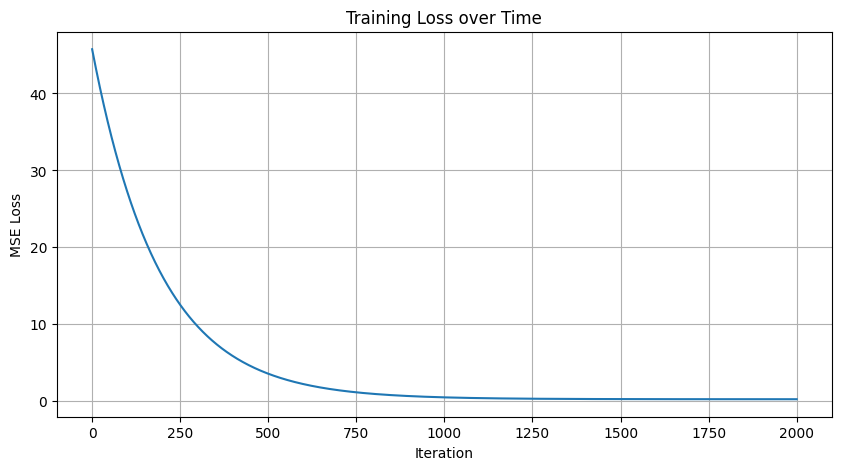

In [206]:
# Visualize the loss curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Time')
plt.grid(True)
plt.show()

---
## Part 5: Feature Scaling

Gradient descent works much better when features are on similar scales. Let's see why and how to fix it.

This is statistical way to standarize any sameple of feature $i$ to a normal distribution:
$$X_i = \frac{x_i-\mu_i}{\sigma_i}$$
where $X_i$ is the column vector of raw data feature $i$

In [207]:
# Create data with very different scales
np.random.seed(42)
X_unscaled = np.column_stack([
    np.random.randn(500) * 1000,      # Feature 1: scale ~1000
    np.random.randn(500) * 0.001,     # Feature 2: scale ~0.001
    np.random.randn(500)              # Feature 3: scale ~1
])
y_unscaled = X_unscaled @ np.array([0.001, 1000, 1]) + 5 + np.random.randn(500) * 0.5

print(f"Feature ranges:")
for i in range(3):
    print(f"  Feature {i+1}: [{X_unscaled[:, i].min():.2f}, {X_unscaled[:, i].max():.2f}]")

Feature ranges:
  Feature 1: [-3241.27, 3852.73]
  Feature 2: [-0.00, 0.00]
  Feature 3: [-2.90, 2.60]


In [208]:
# This will likely fail or converge very slowly!
try:
    w_bad, b_bad, losses_bad = train_linear_regression(
        X_unscaled, y_unscaled, learning_rate=0.01, n_iterations=100
    )
except:
    print("Training failed due to numerical instability!")

Iteration    0 | Loss: 85.696115
Iteration   25 | Loss: 871155159202083101691916910987410951184105321817059387177863498830419367977585214249907478588478402864062258640900040912836205164211861954747717565329822289178308179583604234465185471446639755002073917076050469191680.000000
Iteration   50 | Loss: inf
Iteration   75 | Loss: nan
Iteration   99 | Loss: nan


/var/folders/0j/drg0z8712r98r9zwy747q46r0000gn/T/ipykernel_83658/3246861858.py:14: RuntimeWarning: overflow encountered in square
  return np.sum((y_pred - y_true) ** 2) / n
/var/folders/0j/drg0z8712r98r9zwy747q46r0000gn/T/ipykernel_83658/2670533896.py:36: RuntimeWarning: invalid value encountered in subtract
  w = w - (learning_rate * gd_w)


### Task: Implement standardize function

In [209]:
# Solution: Standardization (Z-score normalization)
def standardize(X: np.ndarray) -> tuple:
    """
    Standardize features to have mean=0 and std=1.
    
    Returns:
        Tuple of (X_standardized, mean, std)
    """
    # Your code here
    mean = X.mean(axis=0)     # (n_features,)
    std = X.std(axis=0)       # (n_features,)
    X_standardized = (X - mean) / std
    return X_standardized, mean, std

In [210]:
# Standardize and train
X_scaled, X_mean, X_std = standardize(X_unscaled)

print(f"Scaled feature ranges:")
for i in range(3):
    print(f"  Feature {i+1}: [{X_scaled[:, i].min():.2f}, {X_scaled[:, i].max():.2f}]")

w_good, b_good, losses_good = train_linear_regression(
    X_scaled, y_unscaled, learning_rate=0.1, n_iterations=500
)

Scaled feature ranges:
  Feature 1: [-3.31, 3.92]
  Feature 2: [-2.79, 2.66]
  Feature 3: [-2.98, 2.47]
Iteration    0 | Loss: 29.787905
Iteration   25 | Loss: 0.240939
Iteration   50 | Loss: 0.240479
Iteration   75 | Loss: 0.240479
Iteration  100 | Loss: 0.240479
Iteration  125 | Loss: 0.240479
Iteration  150 | Loss: 0.240479
Iteration  175 | Loss: 0.240479
Iteration  200 | Loss: 0.240479
Iteration  225 | Loss: 0.240479
Iteration  250 | Loss: 0.240479
Iteration  275 | Loss: 0.240479
Iteration  300 | Loss: 0.240479
Iteration  325 | Loss: 0.240479
Iteration  350 | Loss: 0.240479
Iteration  375 | Loss: 0.240479
Iteration  400 | Loss: 0.240479
Iteration  425 | Loss: 0.240479
Iteration  450 | Loss: 0.240479
Iteration  475 | Loss: 0.240479
Iteration  499 | Loss: 0.240479


---
# Tasks (Deadline: Sunday 30th Nov 2025)

Complete the following tasks to practice implementing gradient descent for linear regression.

## Task 1: Implement Mini-Batch Gradient Descent

Instead of using all samples in each iteration (batch gradient descent), implement **mini-batch gradient descent** which uses a random subset of samples.

Formally said, choose $X_b$ and its corresponding $y_b$ which is a subset of $row(X), row(y)$ to be trained for each iteration.


Benefits of mini-batch:
- Faster iterations
- Can escape local minima
- Better generalization

```python
# Expected usage:
w, b, losses = train_minibatch_gd(X, y, batch_size=32, learning_rate=0.01, n_iterations=1000)
```

In [211]:
def train_minibatch_gd(
    X: np.ndarray,
    y: np.ndarray,
    batch_size: int = 32,
    learning_rate: float = 0.01,
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step: int = 20,
    ) -> tuple:
    """
    Train linear regression using mini-batch gradient descent.

    Hints:
    - Use np.random.choice to select random indices
    - Compute gradients using only the selected samples
    """
    n_samples, n_features = X.shape

    # Initialize parameters randomly
    w = np.random.randn(n_features) * 0.01
    b = 0.0

    loss_history = []

    for i in range(n_iterations):
        # Your code here
        indices = np.random.choice(n_samples, batch_size, replace=False)

        X_batch = X[indices]
        y_batch = y[indices]

        y_pred = predict(X_batch, w, b)
        grad_w, grad_b = compute_gradients(X_batch, y_batch, y_pred)

        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            y_true_pred = predict(X, w, b)
            loss = compute_mse(y_batch, y_pred)
            loss_history.append(loss)
            print(f"Iteration {i:4d} | Loss: {loss:.8f}")

    return w, b, loss_history

In [212]:
_, _, loss_history = train_minibatch_gd(
    X, y,
    batch_size=64,
    learning_rate=0.0005,
    n_iterations=50000,
    log_every_n_step=50
)

Iteration    0 | Loss: 47.60320891
Iteration   50 | Loss: 43.36305756
Iteration  100 | Loss: 37.77736606
Iteration  150 | Loss: 33.06483686
Iteration  200 | Loss: 32.72678333
Iteration  250 | Loss: 26.87241120
Iteration  300 | Loss: 20.14640617
Iteration  350 | Loss: 18.90824063
Iteration  400 | Loss: 26.88736235
Iteration  450 | Loss: 20.42279816
Iteration  500 | Loss: 15.63938501
Iteration  550 | Loss: 15.83761990
Iteration  600 | Loss: 14.39510481
Iteration  650 | Loss: 9.35080931
Iteration  700 | Loss: 9.81617578
Iteration  750 | Loss: 8.85969030
Iteration  800 | Loss: 8.52153552
Iteration  850 | Loss: 9.37523996
Iteration  900 | Loss: 8.51342911
Iteration  950 | Loss: 6.18353404
Iteration 1000 | Loss: 5.97046504
Iteration 1050 | Loss: 5.75242219
Iteration 1100 | Loss: 4.45797834
Iteration 1150 | Loss: 4.68819680
Iteration 1200 | Loss: 4.43386392
Iteration 1250 | Loss: 3.31830159
Iteration 1300 | Loss: 3.17591438
Iteration 1350 | Loss: 3.63039596
Iteration 1400 | Loss: 2.64756132
I

## Task 2: Implement Learning Rate Scheduling

Implement a training function that **decreases the learning rate** over time. This helps converge more precisely at the end of training.

Common schedules:
- Step decay: $\alpha_t = \alpha_0 \cdot 0.9^{\lfloor t/100 \rfloor}$
- Exponential decay: $\alpha_t = \alpha_0 \cdot e^{-kt}$
- Inverse time: $\alpha_t = \frac{\alpha_0}{1 + k \cdot t}$

where $t$ is number of current step/iteration and $k$ is the decay constant

In [213]:
def train_with_lr_schedule(
    X: np.ndarray,
    y: np.ndarray,
    initial_lr: float = 0.1,
    schedule: str = 'exponential',  # 'step', 'exponential', or 'inverse'
    n_iterations: int = 1000,
    decay_constant: float = 0.0001,
    ) -> tuple:
    """
    Train with learning rate scheduling.
    
    Implement at least one scheduling strategy.
    """
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0

    loss_history = []

    step_decay = lambda t: initial_lr * pow(0.9, i//100)
    exp_decay = lambda t: initial_lr * np.exp(-decay_constant * t)
    inv_decay = lambda t: initial_lr / (1 + decay_constant * t)

    for i in range(n_iterations):
        # Your code here
        if schedule == 'step':
            learning_rate = step_decay(i)
        elif schedule == 'exponential':
            learning_rate = exp_decay(i)
        elif schedule == 'inverse':
            learning_rate = inv_decay(i)
        else:
            learning_rate = initial_lr

        y_pred = predict(X, w, b)
        grad_w, grad_b = compute_gradients(X, y, y_pred)

        w -= (learning_rate * grad_w)
        b -= (learning_rate * grad_b)

        loss = compute_mse(y, y_pred)
        loss_history.append(loss)
        
    return w, b, loss_history

In [214]:
# Test them all:
print("Step decay:")
_, _, loss_history_step_decay = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='step',
    n_iterations=100,
    decay_constant=0.0001
)

print("Exponential decay:")
_, _, loss_history_expo_decay = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='exponential',
    n_iterations=100,
    decay_constant=0.0001
)

print("Inverse time decay:")
_, _, loss_history_inve_decay = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='inverse',
    n_iterations=100,
    decay_constant=0.0001
)

Step decay:
Exponential decay:
Inverse time decay:


## Task 3: Add Regularization (Ridge Regression)

Implement **L2 regularization** (Ridge regression) to prevent overfitting.

The loss function becomes:
$$\mathcal{L} = \mathcal{L}_{MSE} + \lambda \sum w_i^2$$

The gradient for weights becomes:
$$\frac{\partial Loss}{\partial w} = \frac{\partial MSE}{\partial w} + 2\lambda w$$

where $\lambda$ is the regularization constant and $w_i$ is the weight value of corresponding feature $i$

In [215]:
def calculate_ridge_loss(y_true: np.ndarray, y_pred: np.ndarray, w: np.ndarray, reg_lambda: float) -> float:
    """
    Compute Ridge regression loss (MSE + L2 regularization).
    
    Args:
        y_true: Actual target values
        y_pred: Predicted values
        w: Weight vector
        reg_lambda: Regularization strength
    
    Returns:
        Ridge loss value
    """
    # Your code here
    mse = compute_mse(y_true, y_pred)
    # L2 term: λ * Σ(w^2)
    l2_penalty = reg_lambda * np.sum(w ** 2)
    return mse + l2_penalty

def calculate_ridge_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray, w: np.ndarray, reg_lambda: float) -> tuple:
    """
    Compute gradients for Ridge regression.
    
    Args:
        X: Feature matrix
        y: True target values
        y_pred: Predicted values
        w: Weight vector
        reg_lambda: Regularization strength
        """
    # Your code here
    grad_w = compute_gradients(X, y, y_pred)[0] + (2 * reg_lambda * w)
    grad_b = compute_gradients(X, y, y_pred)[1]
    
    return grad_w, grad_b

def train_ridge_regression(
    X: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.01,
    reg_lambda: float = 0.1,  # Regularization strength
    n_iterations: int = 1000
    ) -> tuple:
    """
    Train linear regression with L2 regularization.
    
    Hints:
    - Modify the loss calculation to include regularization term
    - Modify the gradient calculation for weights
    - Note: We typically don't regularize the bias term
    """
    # Your code here
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    loss_history = []
    
    for i in range(n_iterations):
        y_pred = predict(X, w, b)
        
        grad_w, grad_b = calculate_ridge_gradients(X, y, y_pred, w, reg_lambda)
        
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b
        
        loss = calculate_ridge_loss(y, y_pred, w, reg_lambda)
        loss_history.append(loss)
        
    return w, b, loss_history


In [216]:
_, _, _ =train_ridge_regression(
    X, y,
    learning_rate=0.01,
    reg_lambda=0.1,
    n_iterations=500
)

## Bonus Task: Implement Stochastic Gradient Descent (SGD)

Implement pure SGD where you update weights after **each individual sample** (batch_size=1).

Compare the convergence behavior of:
1. Batch GD (all samples)
2. Mini-batch GD (e.g., 32 samples)
3. SGD (1 sample)

Plot the loss curves for all three on the same graph.

Iteration    0 | Loss: 45.752853
Iteration    1 | Loss: 43.864218
Iteration    2 | Loss: 42.054061
Iteration    3 | Loss: 40.319117
Iteration    4 | Loss: 38.656260
Iteration    5 | Loss: 37.062492
Iteration    6 | Loss: 35.534939
Iteration    7 | Loss: 34.070850
Iteration    8 | Loss: 32.667586
Iteration    9 | Loss: 31.322617
Iteration   10 | Loss: 30.033520
Iteration   11 | Loss: 28.797972
Iteration   12 | Loss: 27.613747
Iteration   13 | Loss: 26.478712
Iteration   14 | Loss: 25.390822
Iteration   15 | Loss: 24.348117
Iteration   16 | Loss: 23.348718
Iteration   17 | Loss: 22.390827
Iteration   18 | Loss: 21.472717
Iteration   19 | Loss: 20.592735
Iteration   20 | Loss: 19.749296
Iteration   21 | Loss: 18.940882
Iteration   22 | Loss: 18.166036
Iteration   23 | Loss: 17.423365
Iteration   24 | Loss: 16.711531
Iteration   25 | Loss: 16.029252
Iteration   26 | Loss: 15.375300
Iteration   27 | Loss: 14.748499
Iteration   28 | Loss: 14.147719
Iteration   29 | Loss: 13.571880
Iteration 

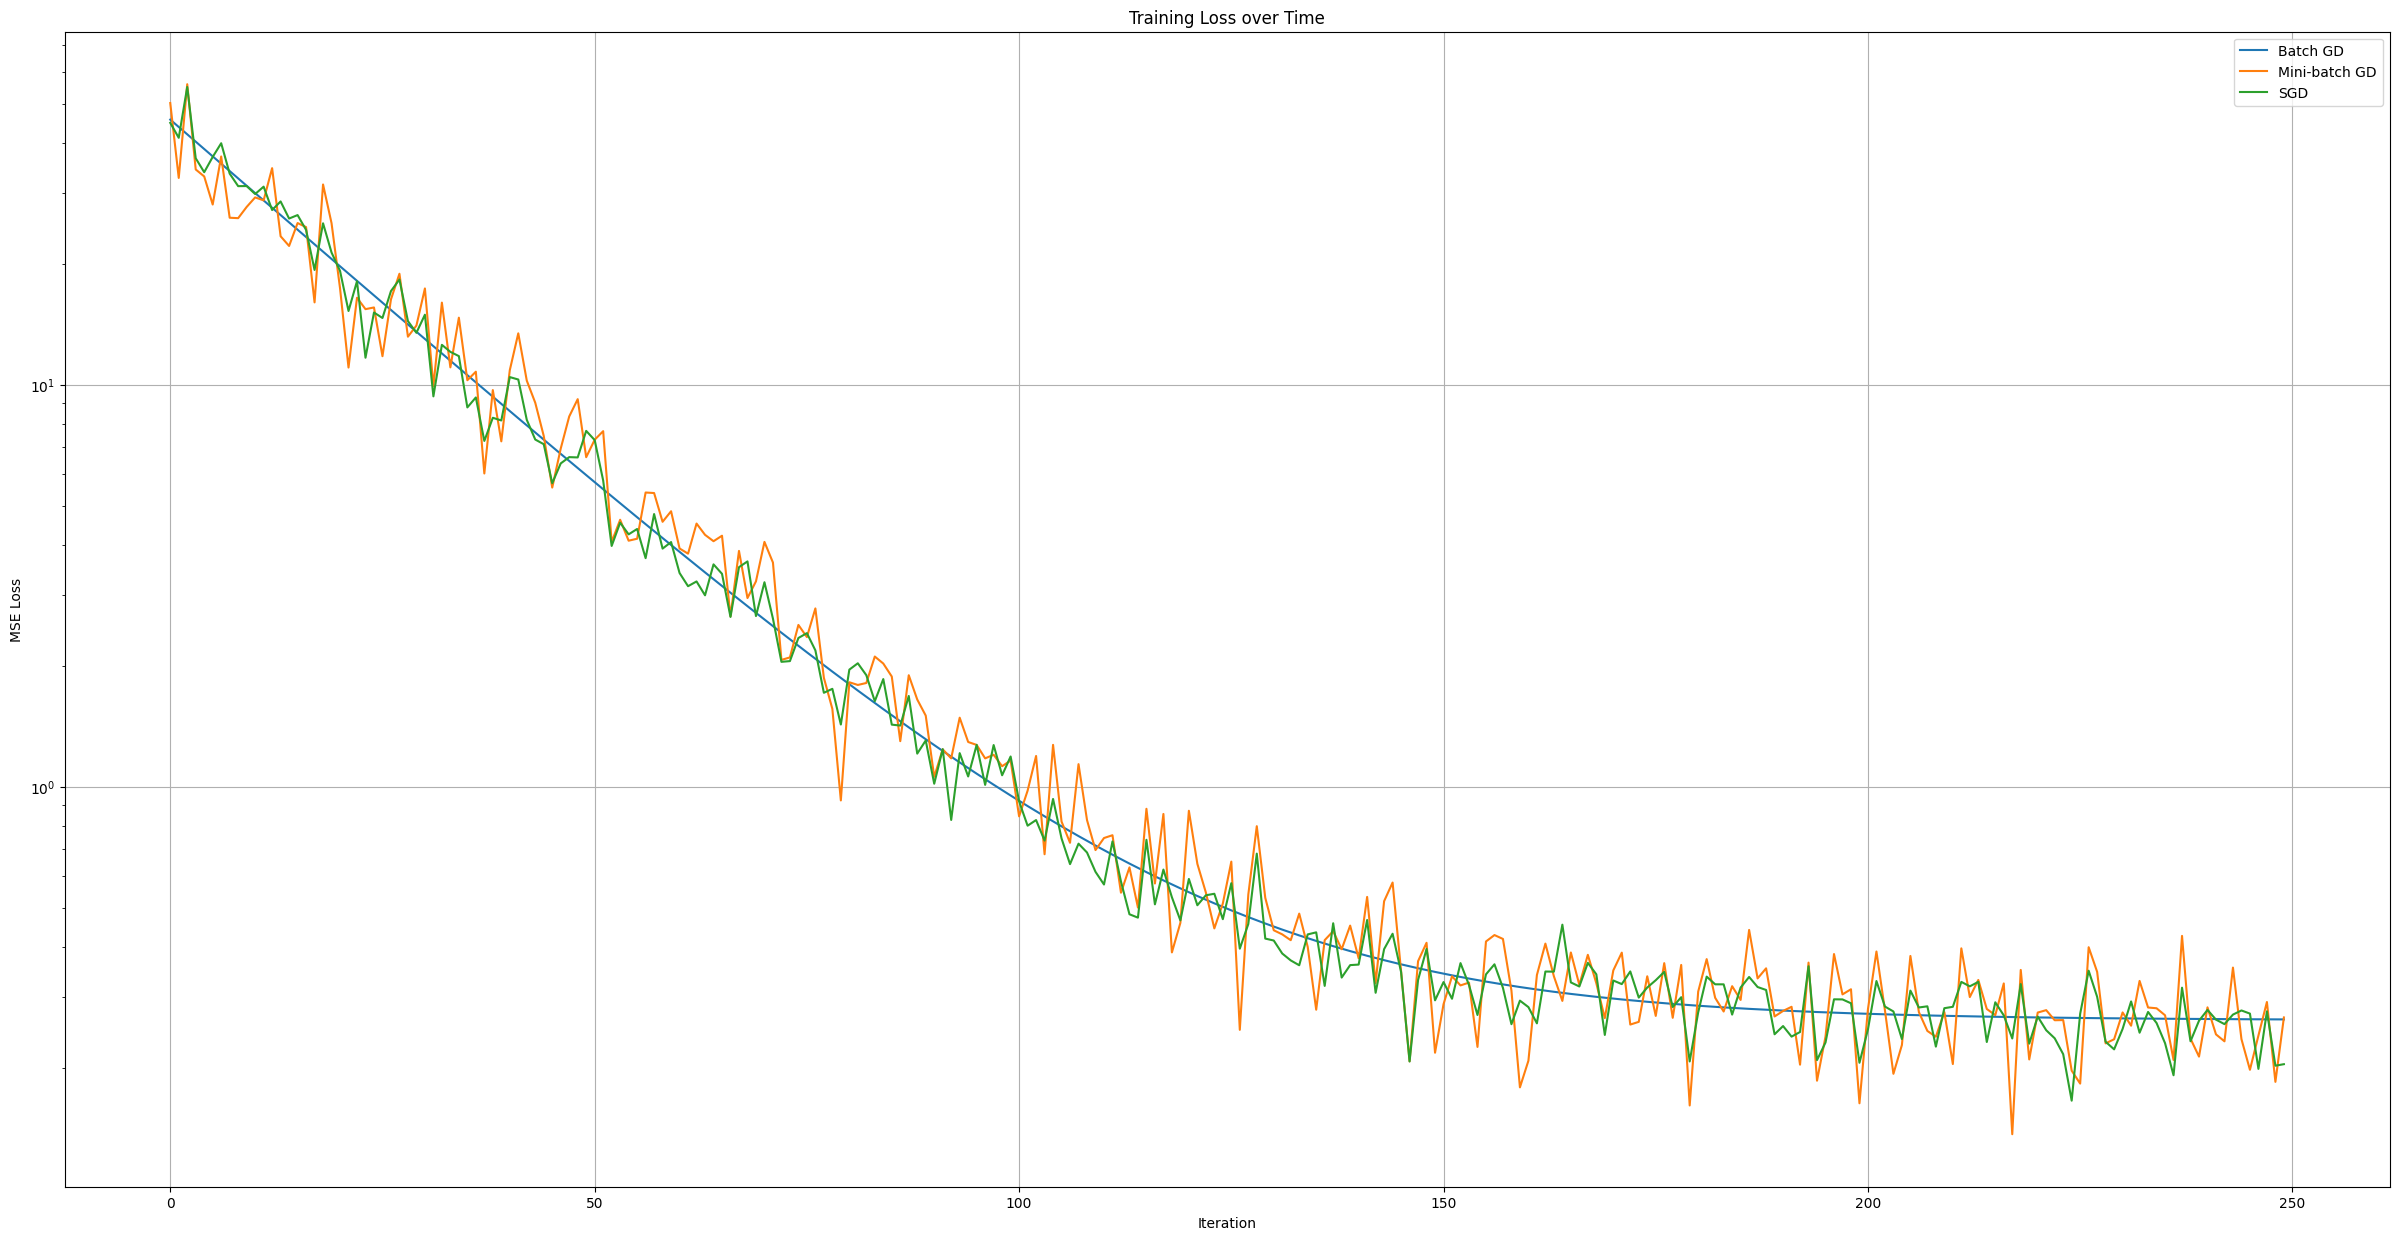

In [217]:
# Your code here
import matplotlib.pyplot as plt

iteration = 250
lr = 0.01

np.random.seed(0)
_,_,loss_batch = train_linear_regression(X, y, lr, iteration, True, 1)
np.random.seed(0)
_,_,loss_mini = train_minibatch_gd(X, y, 32, lr, iteration, True, 1)
np.random.seed(0)
_,_,loss_sgd = train_minibatch_gd(X, y, 64, lr, iteration, True, 1)

plt.figure(figsize=(30, 15))
plt.plot(loss_batch, label='Batch GD')
plt.plot(loss_mini, label='Mini-batch GD')
plt.plot(loss_sgd, label='SGD')

plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Time')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.show()